# Spectral Analysis for paper

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
import swordfish as sf
from WIMpy import DMUtils as DMU
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz
from paleo.paleopy import *

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
%matplotlib inline

#### Load information for Sylvanite

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


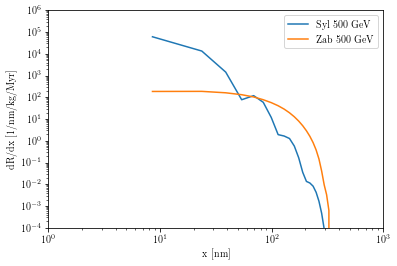

In [10]:
x_bins = np.linspace(1,1000,67)
x_width = np.diff(x_bins)
x_c = x_bins[:-1] + x_width/2
E_list = np.logspace(-1, 3, 500) # keV
nu_list = ['DSNB', 'atm', 'hep', '8B', '15O', '17F', '13N', 'pep','pp','7Be-384','7Be-861']

Syl = dRdx(x_bins, 1e-45, 500, rock='Syl')
Zab = dRdx(x_bins, 1e-45, 500, rock='Zab')
plt.loglog(x_c, Syl, label='Syl 500 GeV')
plt.loglog(x_c, Zab, label='Zab 500 GeV')
plt.legend()
plt.ylabel("dR/dx [1/nm/kg/Myr]")
plt.xlabel("x [nm]")
plt.ylim(1e-4,1e6)
plt.xlim(1,1000)
plt.show()

#### Now we need to load the backgrounds

In [11]:
dRdx_Sylnu = dRdx_nu(x_bins, E_list, rock='Syl', components=True, gaussian=True)
dRdx_Zabnu = dRdx_nu(x_bins, E_list, rock='Zab', components=True, gaussian=True)

#### Lets now load the fission backgrounds

In [12]:
# Syl_fiss_x, Syl_fiss_rate = np.loadtxt('../Data/Sylvanite_fission.dat', usecols=(0,1), unpack=True)
# Zab_fiss_x, Zab_fiss_rate = np.loadtxt('../Data/Zabuyelite_fission.dat', usecols=(0,1), unpack=True)

# Syl_fiss_x *= 10 # Converts angstrom to nm
# Zab_fiss_x *= 10 # Converts angstrom to nm

# Syl_fiss_rate /= 10 # Converts angstrom^-1 to nm^-1
# Zab_fiss_rate /= 10 # Converts angstrom^-1 to nm^-1

# plt.loglog(Zab_fiss_x, Zab_fiss_rate, label='Zab')
# plt.loglog(Syl_fiss_x, Syl_fiss_rate, label='Syl')
# plt.legend()
# plt.show()

In [13]:
# T_half_238 = 4.47e9
# T_fission_238 = 8.4e15
# A = 6.022140857e23
# fission_norm =  lambda n238_permass, E: (n238_permass*(1-np.exp(-E*np.log(2)/T_half_238))
#                              *(T_half_238/T_fission_238))

# molmass = 100 # FIXME: change in the future to accurate numbers
# n238_permass = lambda m: 1e-9*m*1e3*A/molmass

# fis = fission_norm(n238_permass(1),1e7)

# Zab_fiss_rate *= fis
# Syl_fiss_rate *= fis

# plt.loglog(Zab_fiss_x, Zab_fiss_rate, label='Zab')
# plt.loglog(Syl_fiss_x, Syl_fiss_rate, label='Syl')
# plt.legend()
# plt.show()

In [14]:
bkgfis_Zab = fission_bkg(x_bins, 1, 1e7, rock='Zab', gaussian=True)
bkgfis_Syl = fission_bkg(x_bins, 1, 1e7, rock='Syl', gaussian=True)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


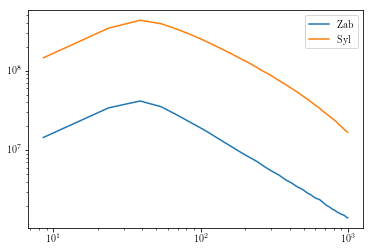

In [15]:
plt.loglog(x_c, bkgfis_Zab, label='Zab')
plt.loglog(x_c, bkgfis_Syl, label='Syl')
plt.legend()
plt.show()

In [16]:
# bkgfis_Zab = interp1d(Zab_fiss_x, Zab_fiss_rate, bounds_error=False,
#                                               fill_value='extrapolate')
# bkgfis_Syl = interp1d(Syl_fiss_x, Syl_fiss_rate, bounds_error=False,
#                                               fill_value='extrapolate')

# dRdx_Sylnu.append(gaussian_filter1d(bkgfis_Syl(x_c)*x_width,1))
# dRdx_Zabnu.append(gaussian_filter1d(bkgfis_Zab(x_c)*x_width,1))
dRdx_Sylnu.append(bkgfis_Syl)
dRdx_Zabnu.append(bkgfis_Zab)
nu_list.append('fission')

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


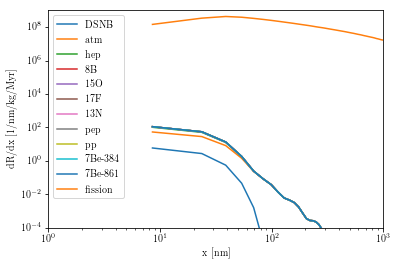

In [17]:
for i, nusource in enumerate(nu_list):
    plt.loglog(x_c, dRdx_Sylnu[i], label=nusource)
#     plt.loglog(x_c,dRdx_Sylnu_gauss[i], label=nusource, ls='--')

# plt.loglog(x_c,dRdx_Sylnu[0], 'C0', label='test')
# plt.loglog(x_c,dRdx_Sylnu_gauss[0], 'C0', label='test', ls='--')
    
# plt.loglog(x_c, dRdx_Sylnu_all, label='Total')
plt.legend()
plt.ylabel("dR/dx [1/nm/kg/Myr]")
plt.xlabel("x [nm]")
plt.ylim(1e-4,1e9)
plt.xlim(1,1000)
plt.show()

In [18]:
ref_sig = 1e-47
systematics = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.01]
mlist = np.logspace(-0.5,4,num=100)
Syl_limit = np.zeros_like(mlist)
Syl_DR = np.zeros_like(mlist)

for i, m in enumerate(mlist):
    SF = sf.Swordfish(dRdx_Sylnu, T=systematics, E=np.ones_like(dRdx_Sylnu[0])*10)
    sig = gaussian_filter1d(dRdx(x_bins, ref_sig, m, rock='Syl'),1)+1e-20
    UL = SF.upperlimit(sig, 0.05)
    DR = SF.discoveryreach(sig, 2.87e-7)
    Syl_limit[i] = ref_sig * UL
    Syl_DR[i] = ref_sig * DR
    
np.savetxt('../ES/limits/Sylvanite_lims.txt', list(zip(mlist, Syl_limit)))

In [19]:
ref_sig = 1e-47
systematics = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.01]
Zab_limit = np.zeros_like(mlist)
Zab_DR = np.zeros_like(mlist)

for i, m in enumerate(mlist):
    SF = sf.Swordfish(dRdx_Zabnu, T=systematics, E=np.ones_like(dRdx_Zabnu[0])*10)
    sig = gaussian_filter1d(dRdx(x_bins, ref_sig, m, rock='Zab'),1)+1e-20
    UL = SF.upperlimit(sig, 0.05)
    DR = SF.discoveryreach(sig, 2.87e-7)
    Zab_limit[i] = ref_sig * UL
    Zab_DR[i] = ref_sig * DR
    
np.savetxt('../ES/limits/Zabuyelite_lims.txt', list(zip(mlist, Zab_limit)))

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


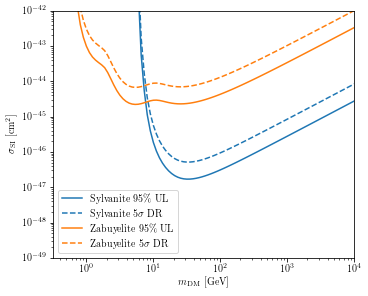

In [20]:
plt.figure(figsize=(5,4))
plt.loglog(mlist,Syl_limit, color='C0', linestyle='-', label=r'Sylvanite 95\% UL')
plt.loglog(mlist,Syl_DR, color='C0', linestyle='--', label=r'Sylvanite $5\sigma$ DR')
plt.loglog(mlist,Zab_limit, color='C1', linestyle='-', label=r'Zabuyelite 95\% UL')
plt.loglog(mlist,Zab_DR, color='C1', linestyle='--', label=r'Zabuyelite $5\sigma$ DR')
plt.ylabel(r'$\sigma_{\mathrm{SI}} ~[\mathrm{cm}^2]$')
plt.xlabel(r'$m_{\mathrm{DM}} ~[\mathrm{GeV}]$')
plt.xlim(10**(-0.5),1e4)
plt.ylim(1e-49,1e-42)
plt.legend()
plt.tight_layout(pad=0.3)
# plt.show()
plt.savefig("../plots/limits_nubkg_separate-10psys.pdf")